In [1]:
!pwd

/Users/rgowrimo/Documents/maskDataSet


In [2]:
!ls

Untitled.ipynb       denseDepthImages.zip fgformat
background           densedepthImages     fgformat.zip
bgformat             fg_bg                foreground
bgformat.zip         fg_bg.zip            labels
create.ipynb         fg_bg_mask           visualization.ipynb


In [4]:
from zipfile import ZipFile
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import io
import skimage
from skimage.transform import resize
from itertools import groupby
import cv2
from tqdm.auto import tqdm
from pathlib import Path
from time import time

sns.set()

In [59]:
def plot_images(images):
    fig = plt.figure(figsize=(50, 40))
    for i in range(10):
        fig.add_subplot(1, 10, i + 1)
        img = images[i]
        plt.imshow(img)
        plt.axis('off')

In [74]:
def skip_mac_metafiles(filename):

    words = ['MACOSX','DS_Store'] 
    for i in words:
        if i in filename:
            return False

    return True

def get_mask_file(filename):

    
    val = skip_mac_metafiles(filename)
    if val == True:
        if "mask" in filename:
            return True
    return False


def get_fg_file(filename):

    words = ['mask', 'MACOSX','DS_Store'] 
    for i in words:
        if i in filename:
            return False

    return True

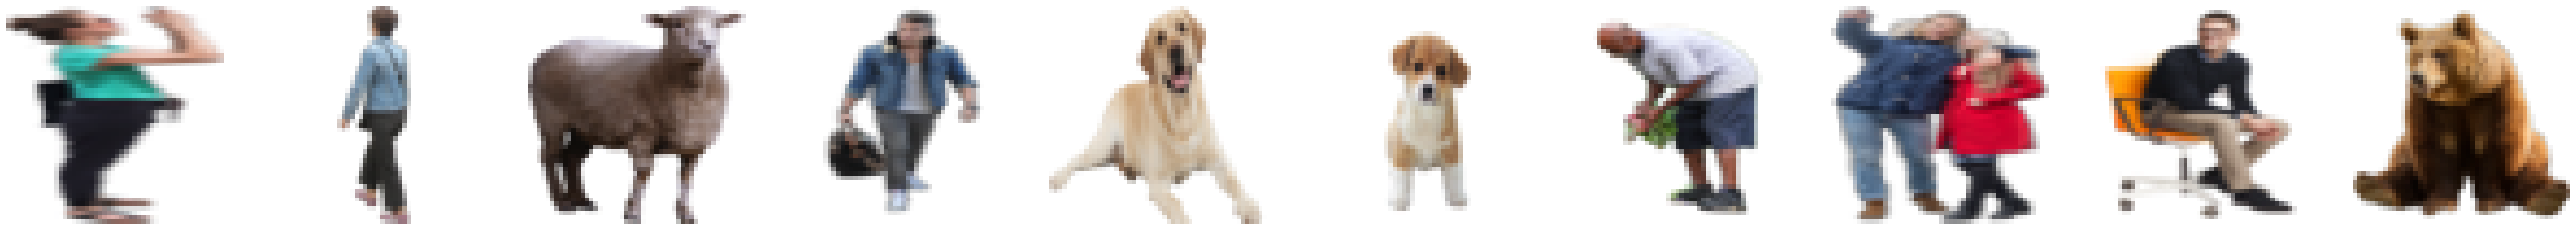

In [75]:
fg_zip =  ZipFile('fgformat.zip', 'r')
all_files = []


for name in fg_zip.infolist():
    if(get_fg_file(name.filename)) and not name.is_dir():
        all_files.append(name)


images = []
for file in all_files[:10]:
    imgdata = fg_zip.read(file)
    img = Image.open(io.BytesIO(imgdata))
    img = img.resize((50, 50)) 
    images.append(img)
    

plot_images(images)

fg_zip.close()

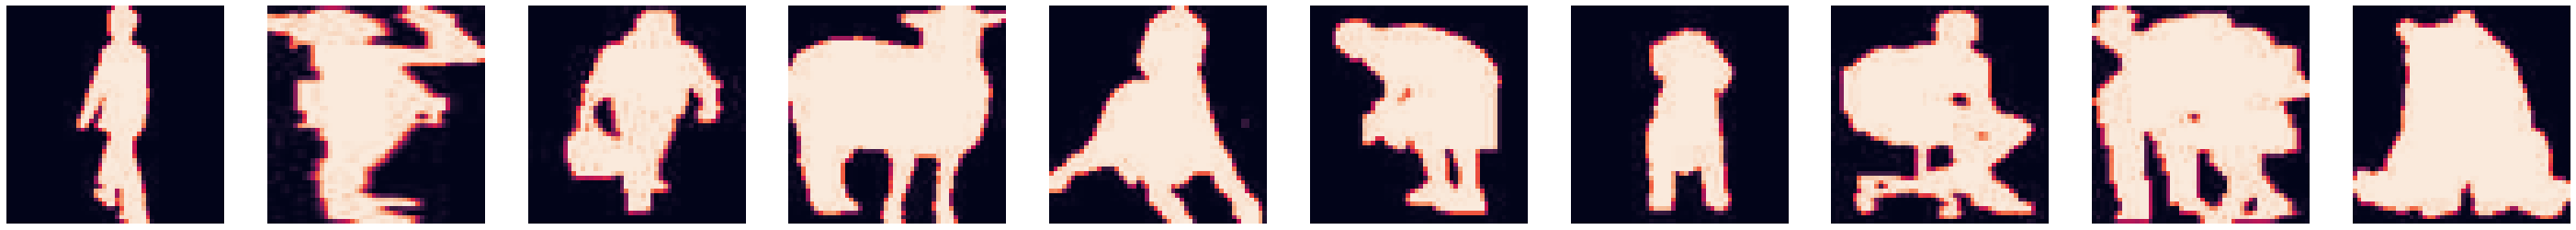

In [79]:
fg_zip =  ZipFile('fgformat.zip', 'r')
all_files = []


for name in fg_zip.infolist():
    if(get_mask_file(name.filename)) and not name.is_dir():
        all_files.append(name)


images = []
for file in all_files[:10]:
    imgdata = fg_zip.read(file)
    img = Image.open(io.BytesIO(imgdata))
    img = img.resize((50, 50)) 

    images.append(img)

plot_images(images)
fg_zip.close()

mask_fg_bg/dd_fg_bg0/mask_dd_fg_bg0.png
mask_fg_bg/dd_fg_bg1/mask_dd_fg_bg1.png
mask_fg_bg/dd_fg_bg2/mask_dd_fg_bg2.png
mask_fg_bg/dd_fg_bg3/mask_dd_fg_bg3.png
mask_fg_bg/dd_fg_bg4/mask_dd_fg_bg4.png
mask_fg_bg/dd_fg_bg5/mask_dd_fg_bg5.png


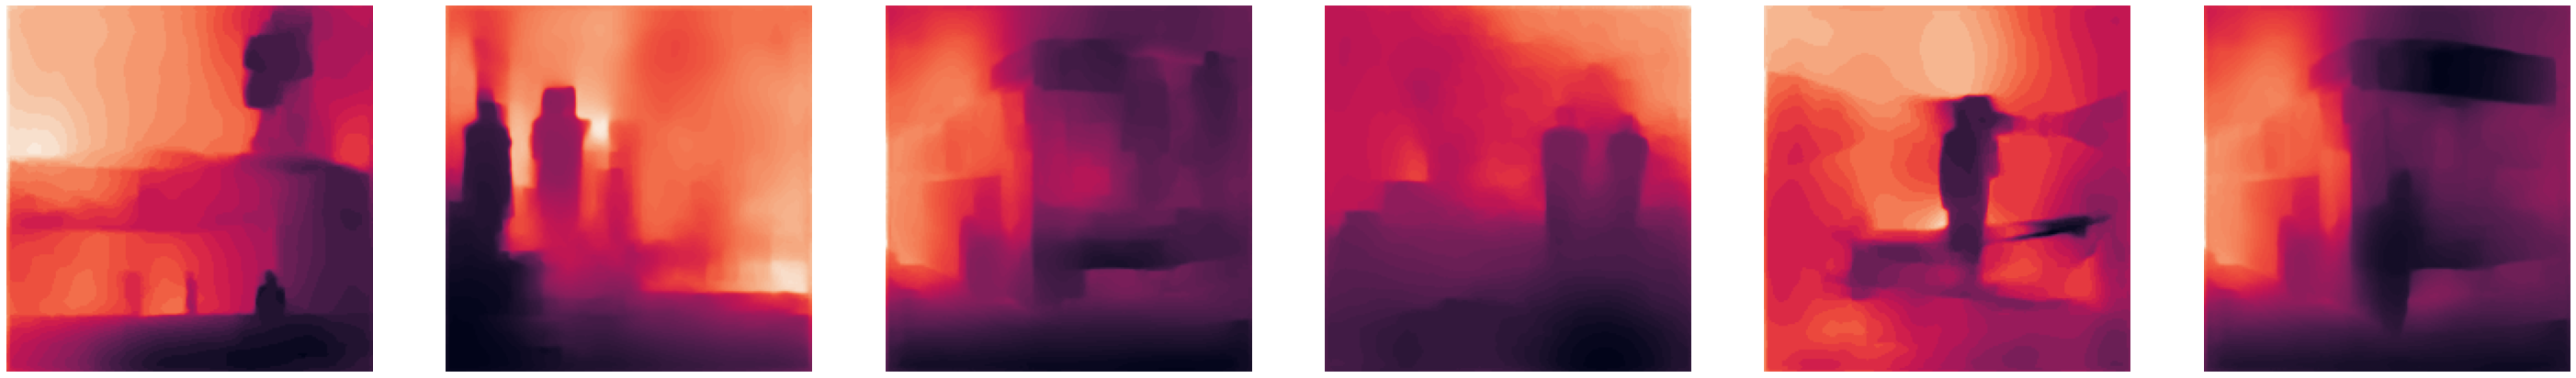

In [100]:
dd_zip = ZipFile('dd_output_fg_bg.zip', 'r')

all_files = []
for name in dd_zip.infolist():
    if(skip_mac_metafiles(name.filename)) and not name.is_dir():
        print(name.filename)
        all_files.append(name)


images = []
for file in all_files[:7]:
    imgdata = dd_zip.read(file)
    img = Image.open(io.BytesIO(imgdata)).convert('L')

    images.append(img)
fig = plt.figure(figsize=(50, 40))
for i in range(6):
    fig.add_subplot(1, 6, i + 1)

    # render image tensor
    img = images[i]
    #npimg = img.numpy()    
    plt.imshow(img)
    plt.axis('off')
    

dd_zip.close()

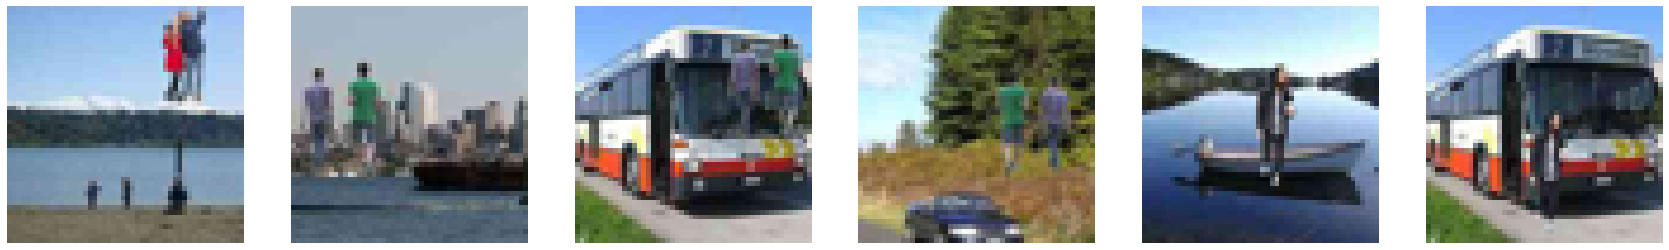

In [104]:
fg_zip =  ZipFile('denseDepthImages.zip', 'r')
all_files = []


for name in fg_zip.infolist():
    if(skip_mac_metafiles(name.filename)) and not name.is_dir():
        all_files.append(name)


images = []
for file in all_files[:7]:
    imgdata = fg_zip.read(file)
    img = Image.open(io.BytesIO(imgdata))
    img = img.resize((50, 50)) 
    images.append(img)
    
fig = plt.figure(figsize=(50, 40))
for i in range(6):
    fig.add_subplot(1, 10, i + 1)
    img = images[i]
    plt.imshow(img)
    plt.axis('off')

fg_zip.close()

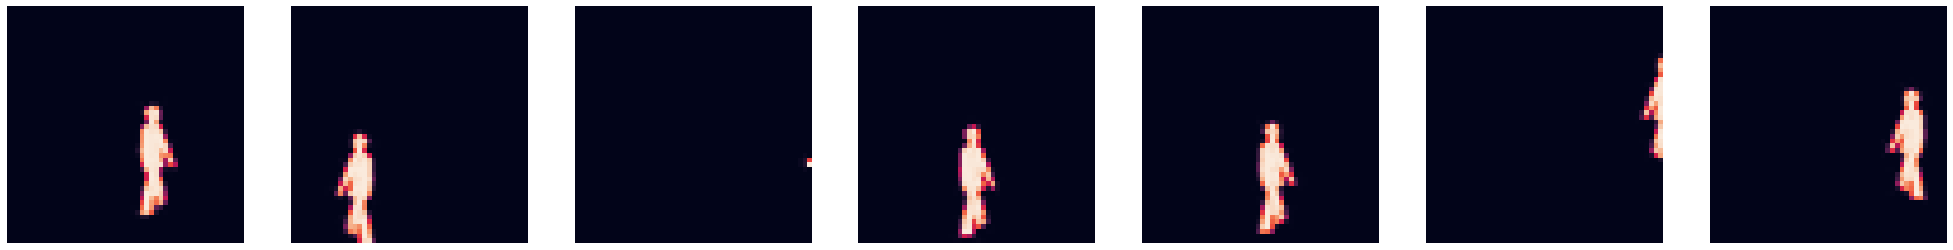

In [108]:
fg_zip =  ZipFile('fg_bg_mask.zip', 'r')
all_files = []


for name in fg_zip.infolist():
    if(skip_mac_metafiles(name.filename)) and not name.is_dir():
        all_files.append(name)


images = []
for file in all_files[:7]:
    imgdata = fg_zip.read(file)
    img = Image.open(io.BytesIO(imgdata))
    img = img.resize((50, 50)) 
    images.append(img)
    
fig = plt.figure(figsize=(50, 40))
for i in range(7):
    fig.add_subplot(1, 10, i + 1)
    img = images[i]
    plt.imshow(img)
    plt.axis('off')

fg_zip.close()